<a href="https://colab.research.google.com/github/ch0t8881/IITM-Data-Science-GUVI-Projects---/blob/main/KNN%2CDT%2CLR%2CSVMClassification(nethu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 Classification

- K-Nearest Neighbour
- Decision Trees
- Logistic Regression
- Support Vector Machines

# What is Classification?

>classification is a supervised learning approach
- categorizing or "classifying" some unknown items into a discrete set of "classes."
- learn the relationship between a set of feature variables and a target variable of interest.
- target attribute in classification is a categorical variable with discrete values.

## Types of Classification Algorithms 

- Decision Trees
- Naïve Bayes
- Linear Discriminant Analysis
- K-Nearest Neighbor
- Logistic Regression
- Neural Networks
- Support Vector Machines

# K-Nearest Neighbour

## Import Libraries

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

## Visualize and Analyze Data 

In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec81cb910>]],
      dtype=object)

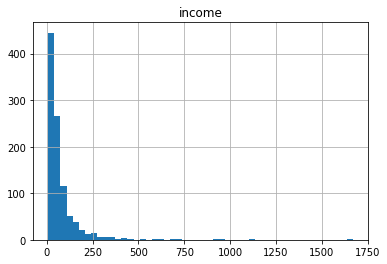

In [ ]:
df.hist(column='income', bins=50)

## Define Feature Sets

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
X = df[['region', 'tenure','age', 'marital', 'income', 'ed', 'employ','retire', 'gender']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,  64.,   4.,   5.,   0.,   0.],
       [  3.,  11.,  33.,   1., 136.,   5.,   5.,   0.,   0.],
       [  3.,  68.,  52.,   1., 116.,   1.,  29.,   0.,   1.],
       [  2.,  33.,  33.,   0.,  33.,   2.,   0.,   0.,   1.],
       [  2.,  23.,  30.,   1.,  30.,   1.,   2.,   0.,   0.]])

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data

In [ ]:
#from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.12650641,
         1.0877526 , -0.5941226 , -0.22207644, -1.03459817],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 ,  0.54644972,
         1.9062271 , -0.5941226 , -0.22207644, -1.03459817],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  0.35951747,
        -1.36767088,  1.78752803, -0.22207644,  0.96655883],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 , -0.41625141,
        -0.54919639, -1.09029981, -0.22207644,  0.96655883],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.44429125,
        -1.36767088, -0.89182893, -0.22207644, -1.03459817]])

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 9) (700,)
Test set: (300, 9) (300,)


## K Nearest Neighbor (K-NN) Classification

### Import

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Train

In [ ]:
k = 4
#Train Model and Predict  
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

### Predict

In [ ]:
yhat = model.predict(X_test)
yhat

In [ ]:
data=[1,10,35,0,100000,5,5,0,1]
model.predict([data])

array([2])

## Evaluate Accuracy 

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5557142857142857
Test set Accuracy:  0.33


## Build the model with k=6

In [ ]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.4975
Test set Accuracy:  0.29


### Calucalte the accuracy of KNN for different Ks

In [ ]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.27666667, 0.29      , 0.33      , 0.33      , 0.33666667,
       0.34      , 0.34666667, 0.33666667, 0.35333333])

## Plot Model Accuracy

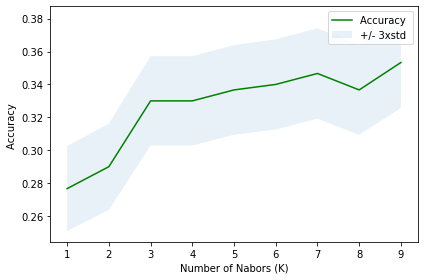

In [ ]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7


# K-Nearest Neighbors for Classification (using breast cancer data)

In [ ]:
import pandas as pd

data_dir = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/breast-cancer.csv"
df_breast = pd.read_csv(data_dir)
df_breast.head()


ID  Clump Thickness  ...  Mitoses  Class
0  1000025                5  ...        1      0
1  1002945                5  ...        1      0
2  1015425                3  ...        1      0
3  1016277                6  ...        1      0
4  1017023                4  ...        1      0

[5 rows x 11 columns]

We focus on just two features for now: Clump Thickness and Uniformity of Cell Size. Let's plot the training data, using color to represent the class label.

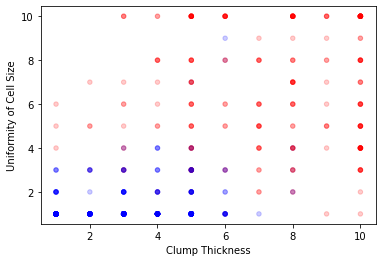

In [ ]:
colors = df_breast["Class"].map({
    0: "blue",
    1: "red"
})

df_breast.plot.scatter(
    x="Clump Thickness", y="Uniformity of Cell Size", c=colors, 
    alpha=.2
)

In [ ]:
X_train = df_breast[["Clump Thickness", "Uniformity of Cell Size"]]
y_train = df_breast["Class"]



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# define a pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)

# fit the pipeline (using X_train and y_train defined above)
pipeline.fit(X_train, y_train)

# define the test data (recall that scikit-learn expects a 2D-array)
pipeline.predict([[6, 7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])

## Evaluation Metrics

>Evaluation metrics explain the performance of a model.
- compare the actual values in the test set with the values predicted by the model, to calculate the accuracy of the model.
- provide insight to areas that might require improvement.

>Model evaluation metrics that are used for classification:
- Jaccard index
- F1-score
- Log Loss

# Decision Trees

## Building Decision Trees

## Build a model from historical data of patients
>build a model from historical data of patients, and their respond to different medications. 

>use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Root Node: It decides the entire population or sample data should further get divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not.

Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node

In [ ]:
#calculation example
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

# Print head
#
df.head()


outlook  temp  humidity  windy  play
0        2     1         0      0     0
1        2     1         0      1     0
2        0     1         0      0     1
3        1     2         0      0     1
4        1     0         1      0     1

In [ ]:
X = df[['outlook', 'temp', 'humidity', 'windy']].values
y = df["play"]

model= DecisionTreeClassifier(criterion="gini", max_depth = 4)
model.fit(X,y)


DecisionTreeClassifier(max_depth=4)

In [ ]:
# Visualize data
import collections
data_feature_names=['outlook', 'temp', 'humidity', 'windy']
dot_data = tree.export_graphviz(model,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')


True

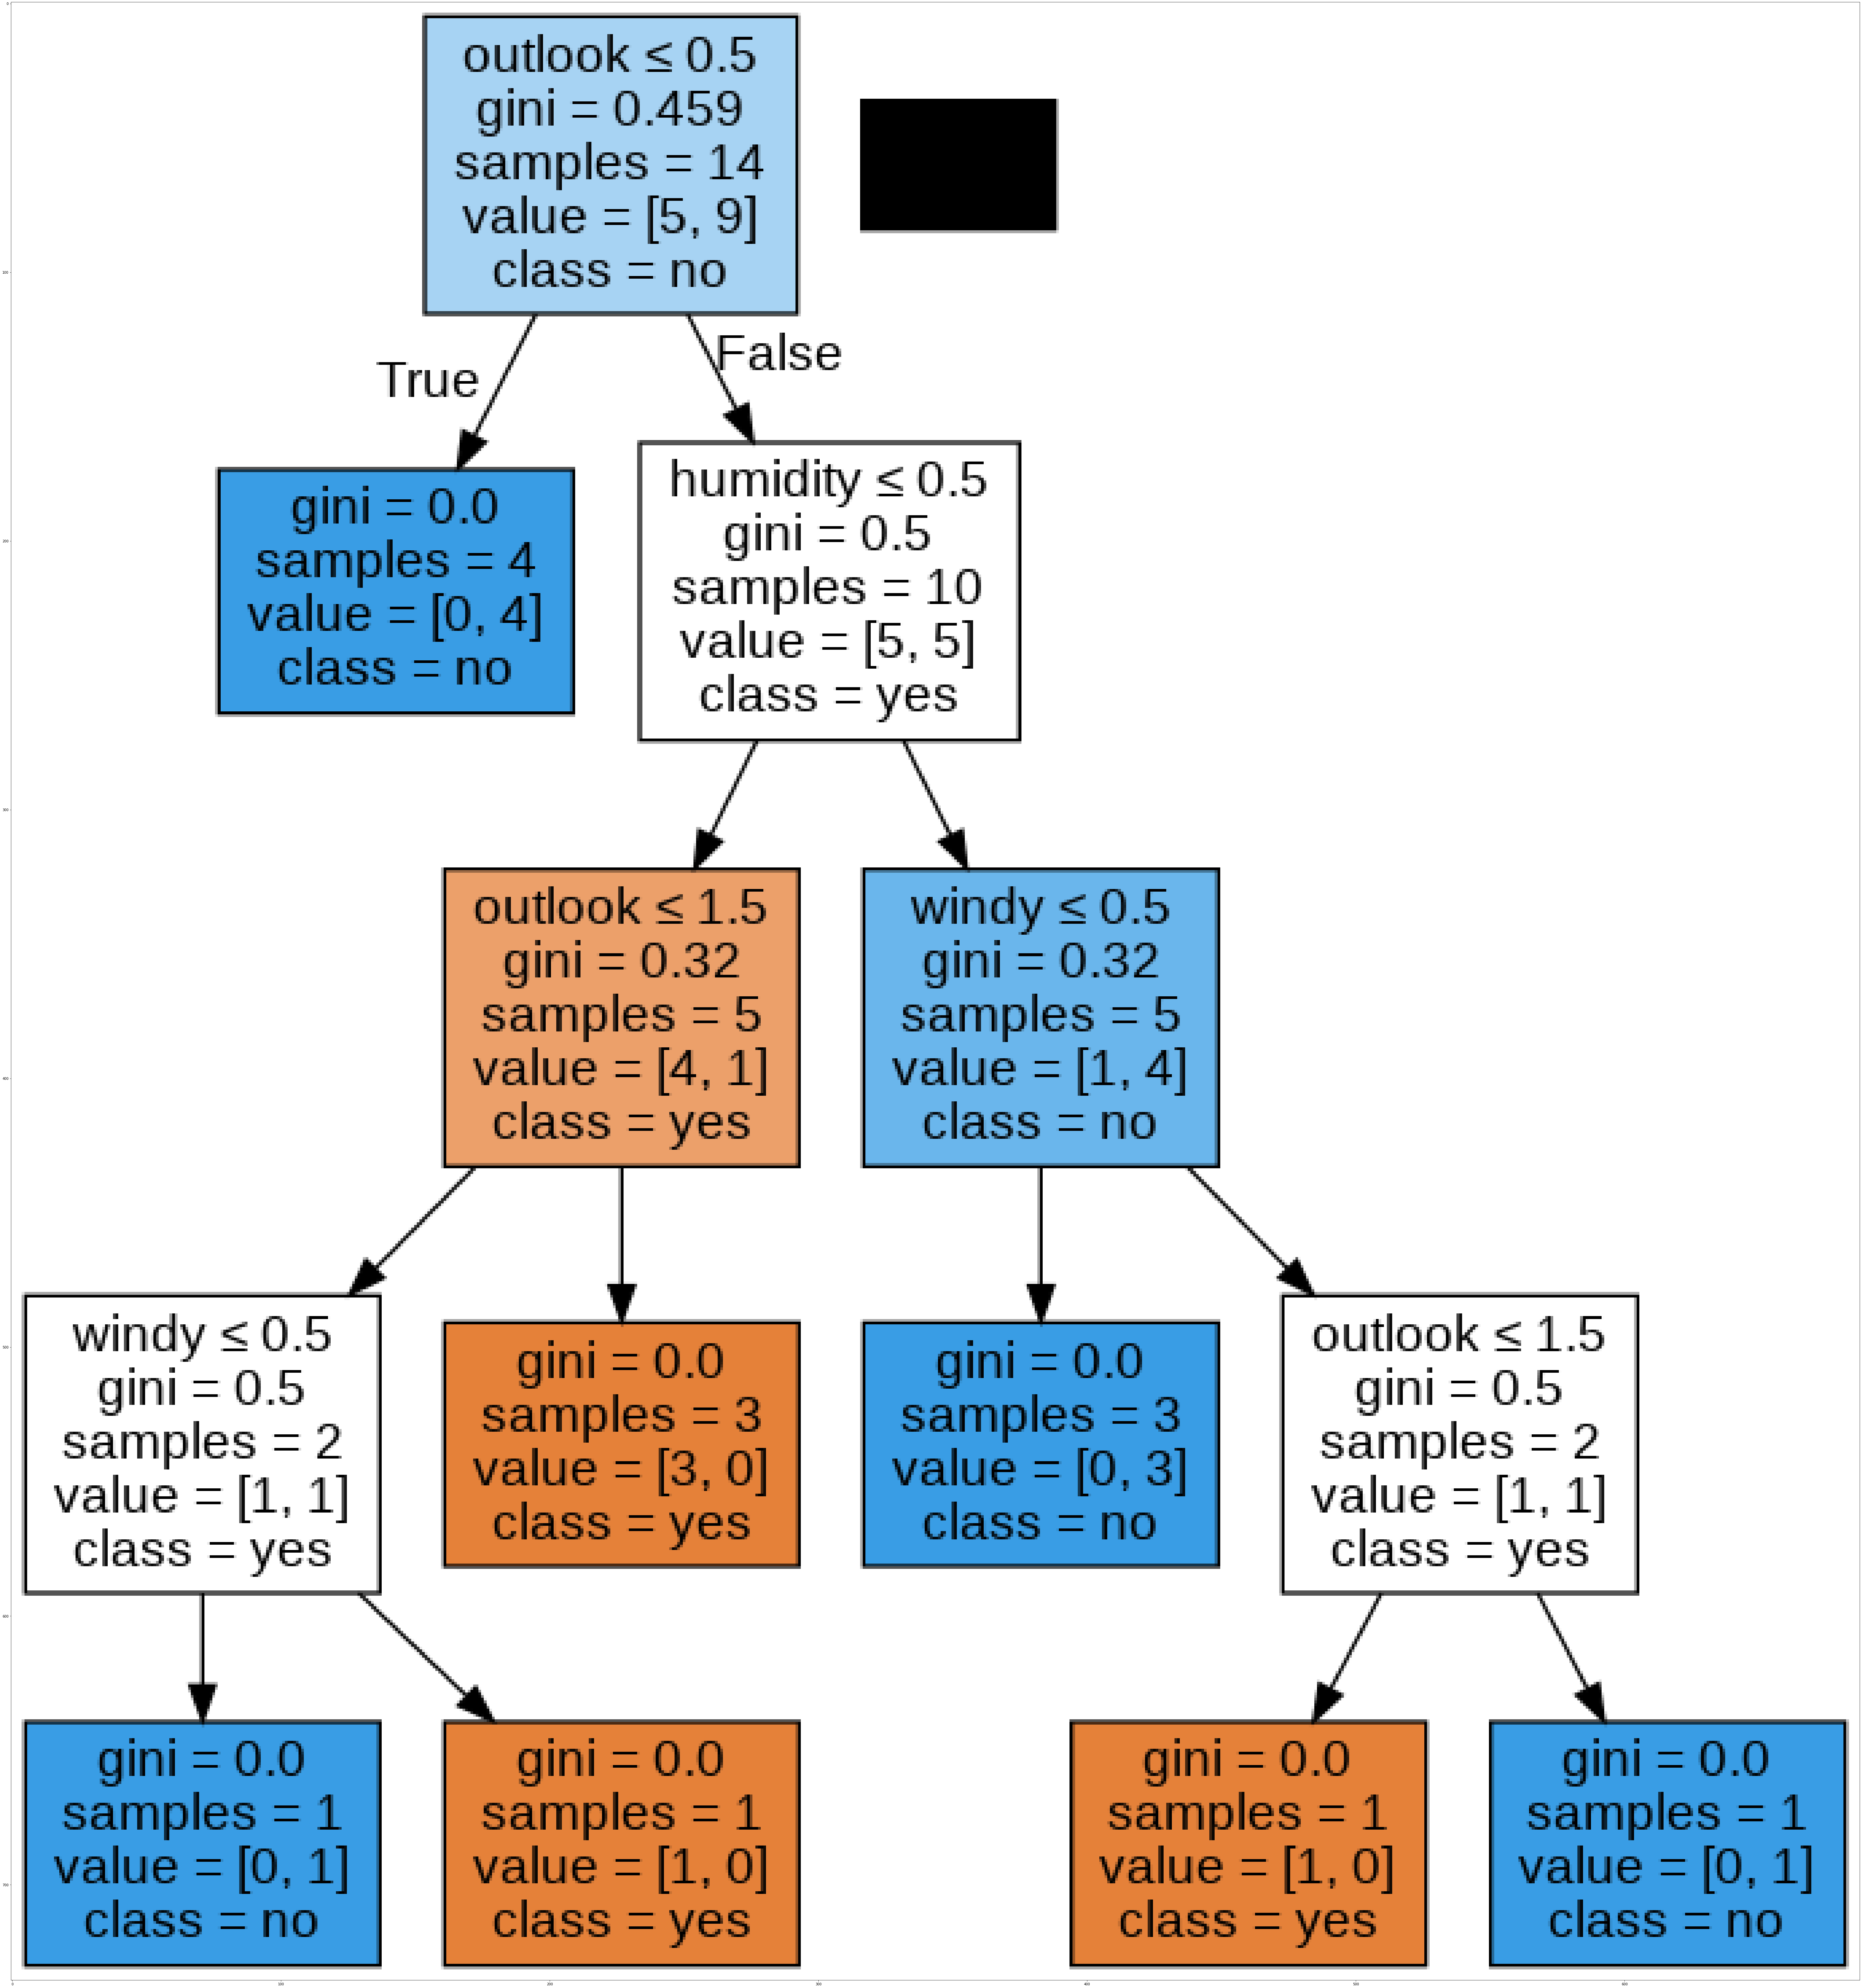

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = ['outlook', 'temp', 'humidity', 'windy']
#targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names=['yes','no'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

## Read Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/drug200.csv")
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [ ]:
df.shape

(200, 6)

## Pre-process Data

### Define Feature Matrix

In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

### Convert catergorical features to numerical values
>use pandas.get_dummies() to convert categorical variable into dummy/indicator variables.

In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

In [ ]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [ ]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

In [ ]:
X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Define Target Variable

In [ ]:
y = df["Drug"]
y[:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Set up Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
X.shape,y.shape

((200, 5), (200,))

In [ ]:
X_train.shape,y_train.shape

((140, 5), (140,))

In [ ]:
X_test.shape,y_test.shape

((60, 5), (60,))

## Model

>specify criterion="entropy" so we can see the information gain of each node.

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Train

In [ ]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predict

In [ ]:
predTree = drugTree.predict(X_test)

In [ ]:
print(predTree[:5])
print(y_test[:5].values)

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evaluate

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(y_test, predTree)}")

DecisionTrees's Accuracy: 0.9833333333333333


## Visualize 

In [ ]:
!pip install six

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

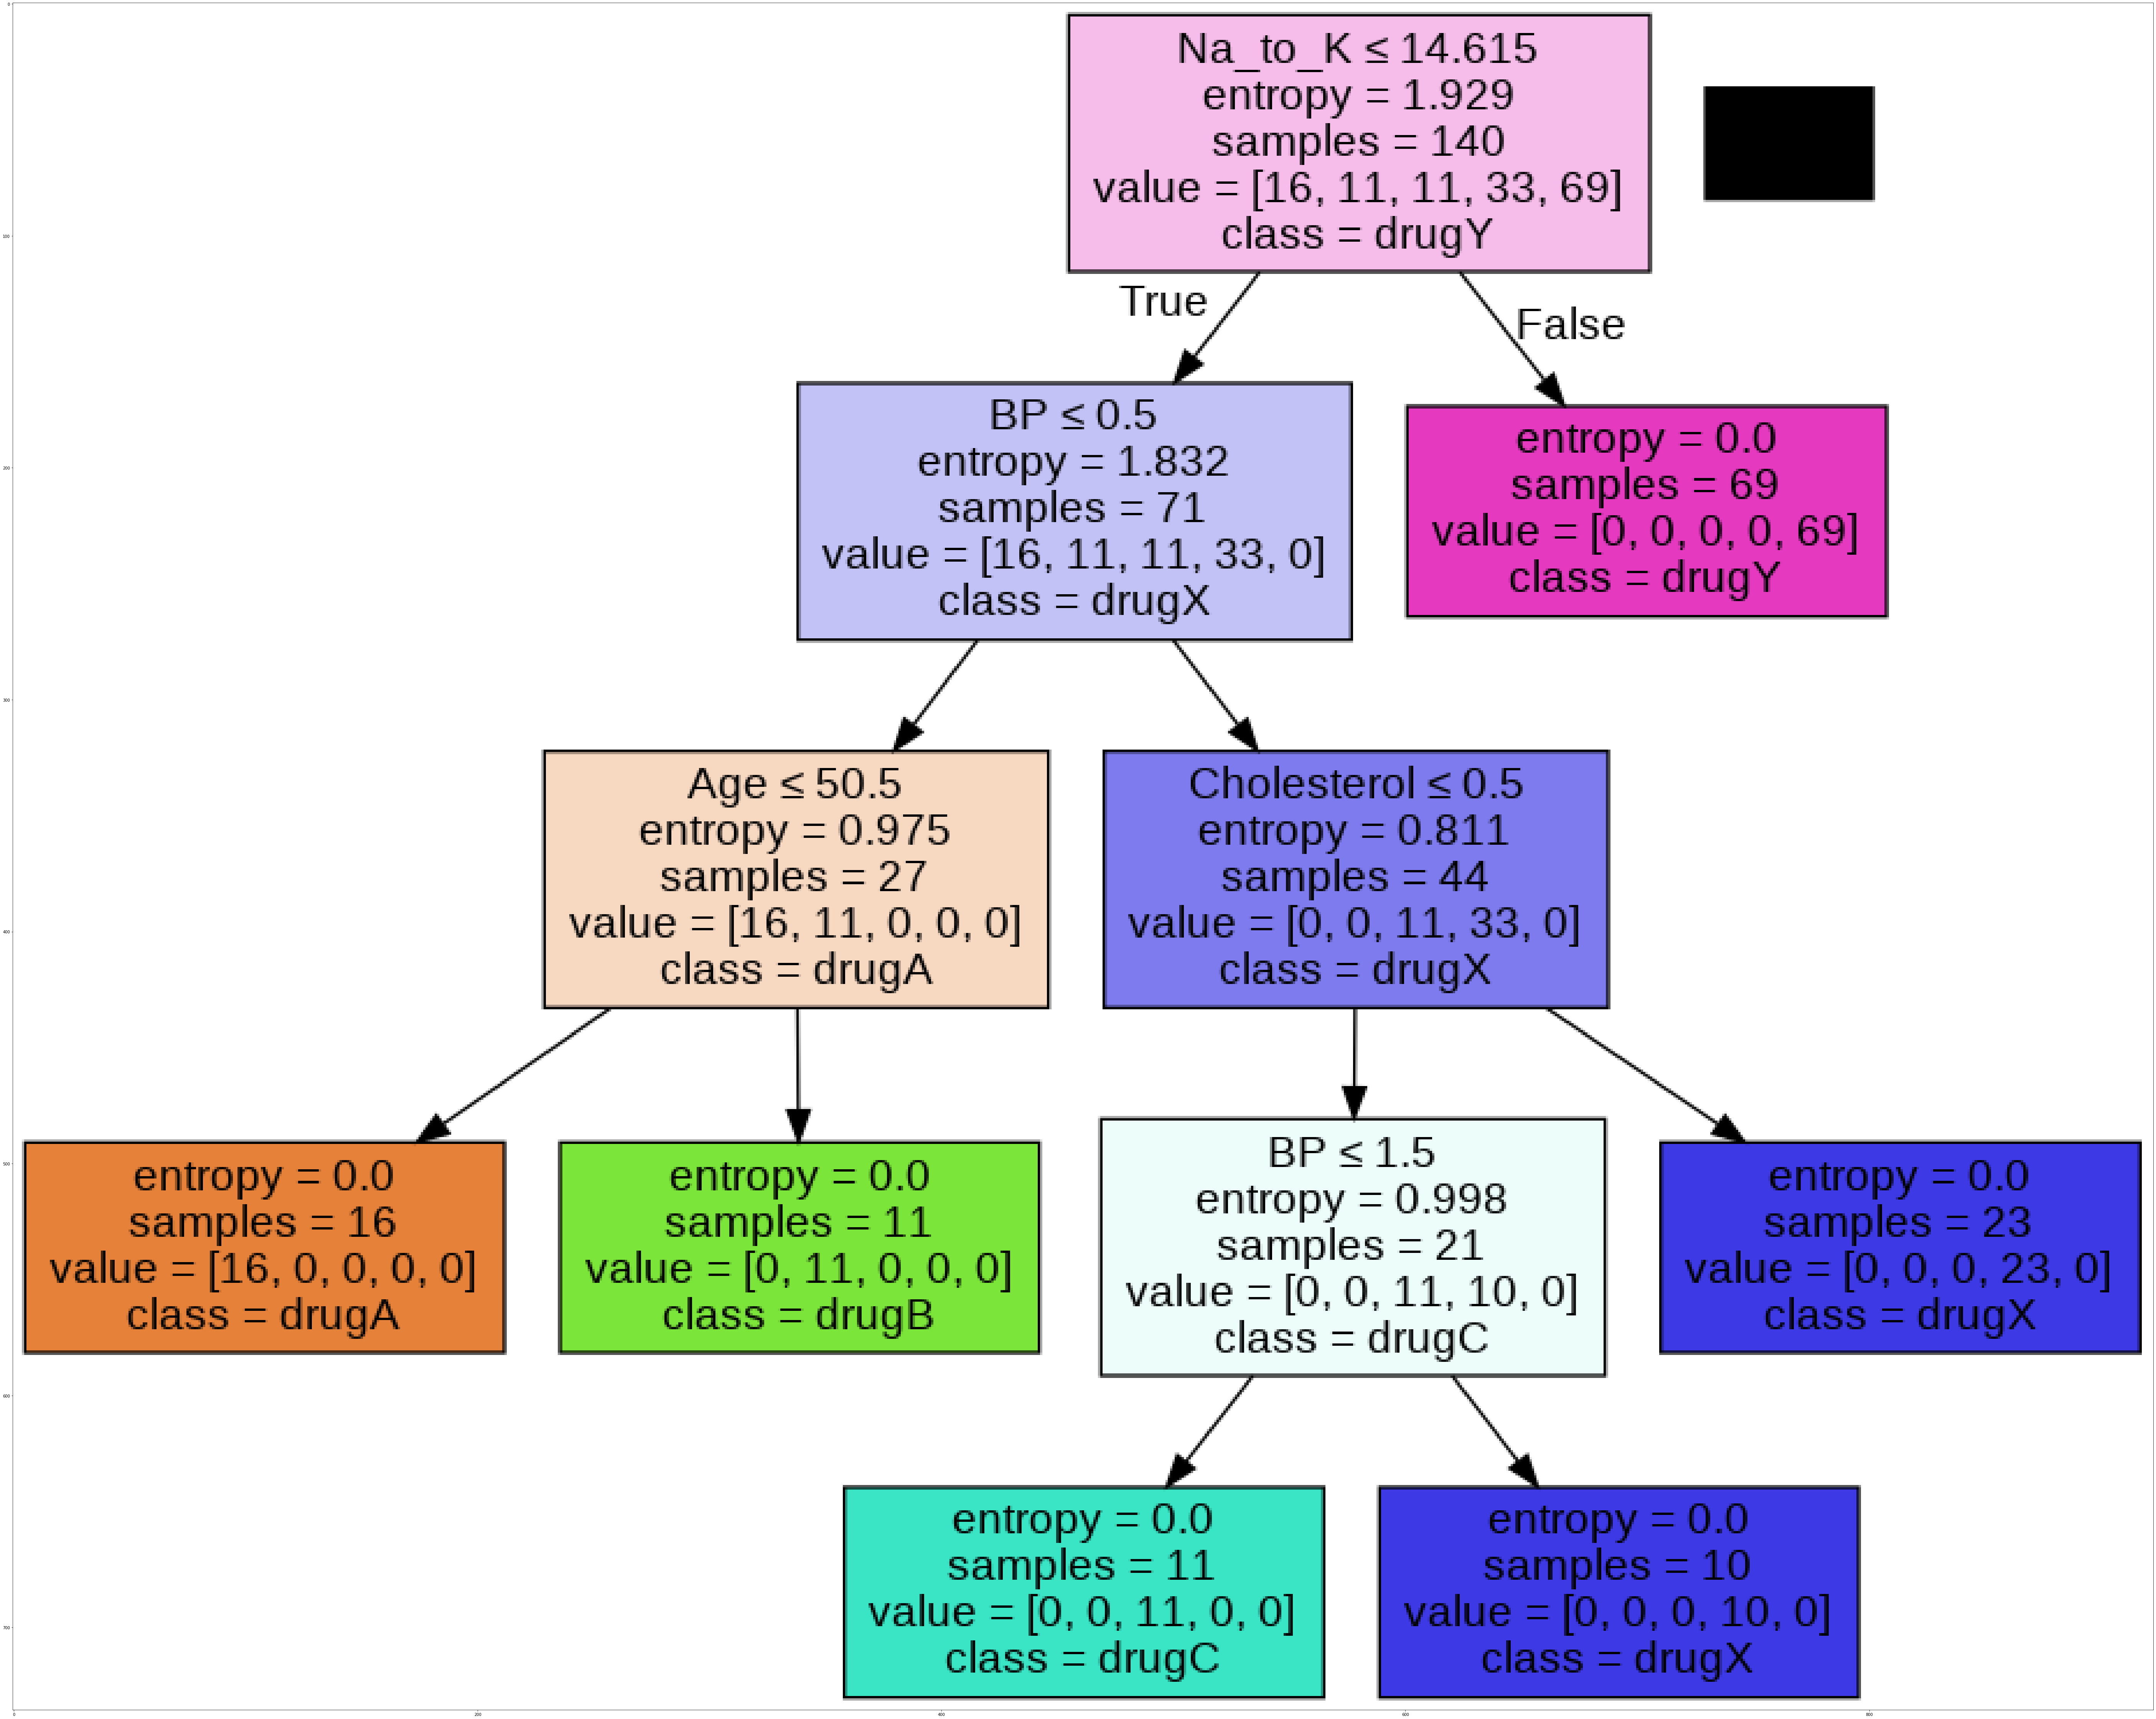

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#heart disease with DT


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/heart.csv'
df = pd.read_csv(data)
df.head()


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

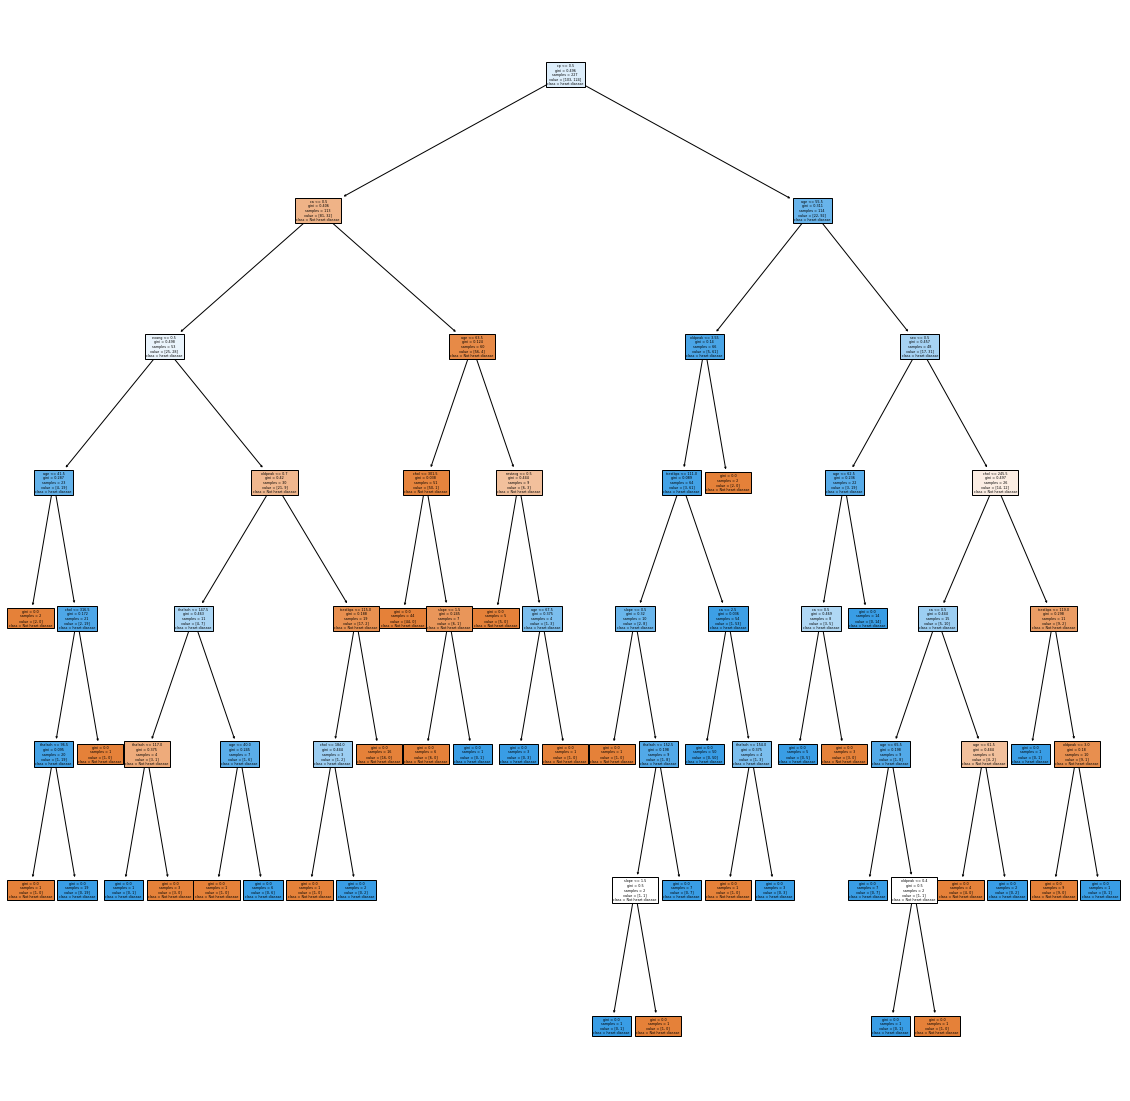

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 1.0
Test score 0.7763157894736842
Train Confusion matrix


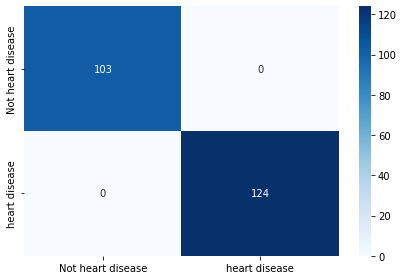

Test Confusion matrix


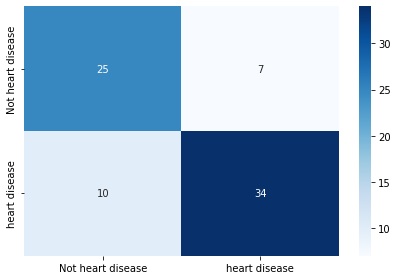

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')
   

We can see that in our train data we have 100% accuracy (100 % precison and recall). But in test data model is not well generalizing. We have just 75% accuracy. Over model is clearly overfitting. 

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

max_depth: maximum depth of decision tree

min_sample_split: The minimum number of samples required to split an internal node:

min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8986784140969163
Test score 0.8026315789473685
Train Confusion matrix


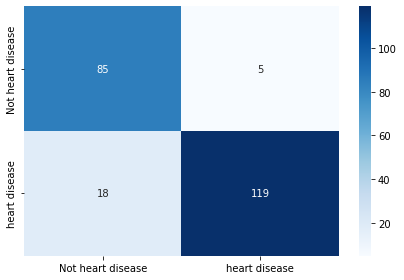

Test Confusion matrix


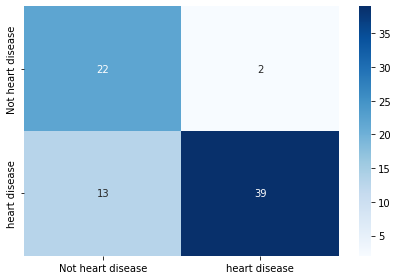

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

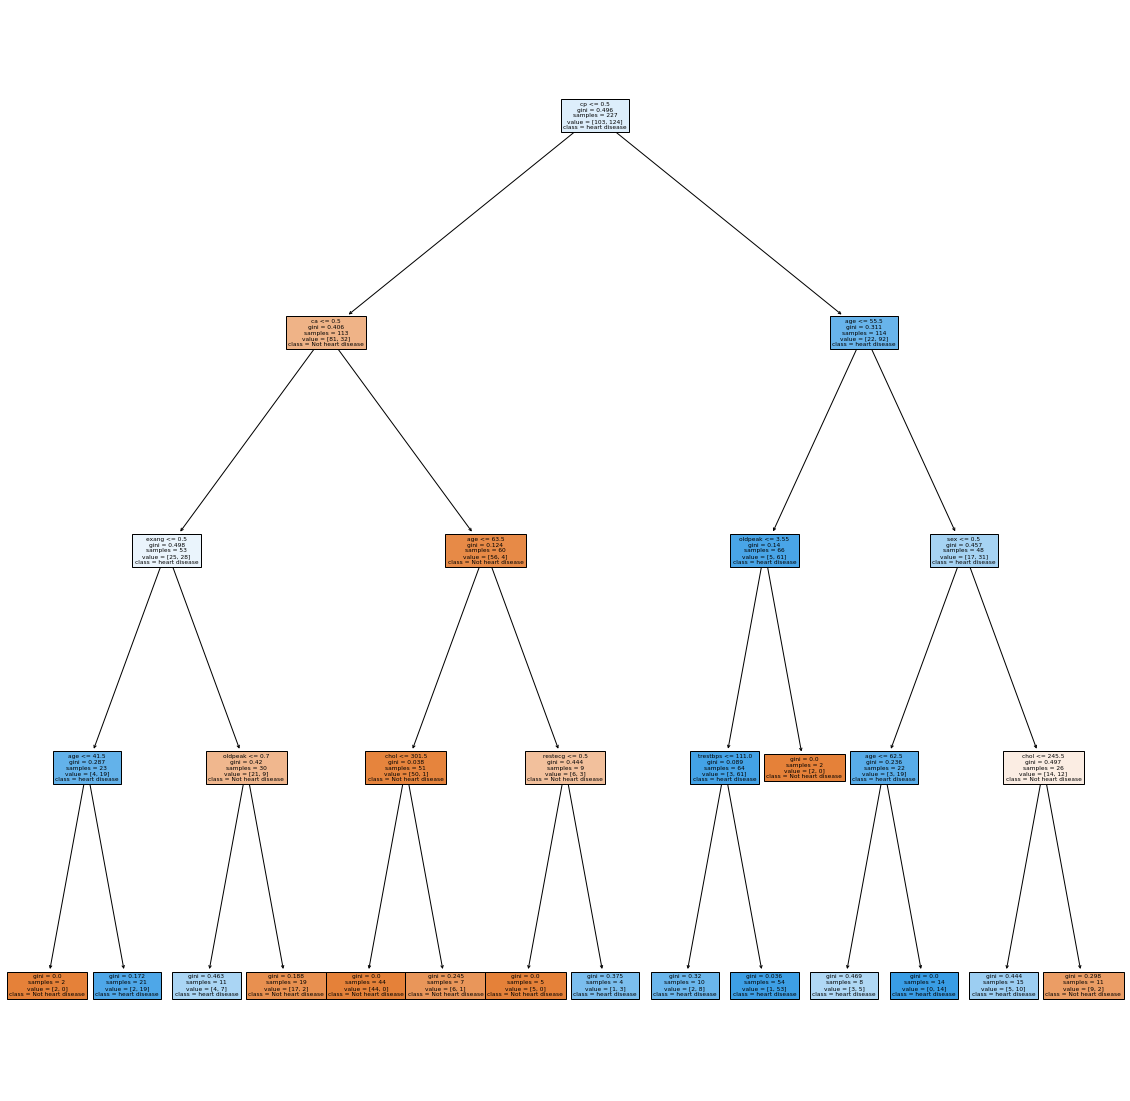

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

DT


In [ ]:
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from dtreeviz.trees import *
import graphviz 

import warnings
warnings.filterwarnings("ignore") 
wine = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/winequalityN.csv')
wine.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
wine['quality'].value_counts()


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
#features = wine.drop('type',axis=1)
#features = wine.drop('quality',axis=1)
features = wine.drop(['quality','type'],axis=1)
target = wine['quality']
features.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.0              0.27         0.36  ...  3.00       0.45      8.8
1            6.3              0.30         0.34  ...  3.30       0.49      9.5
2            8.1              0.28         0.40  ...  3.26       0.44     10.1
3            7.2              0.23         0.32  ...  3.19       0.40      9.9
4            7.2              0.23         0.32  ...  3.19       0.40      9.9

[5 rows x 11 columns]

In [ ]:
features.isnull().sum()


fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [ ]:
cleanfeat=features.fillna(method="ffill")

In [ ]:
cleanfeat.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 1800x1440 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


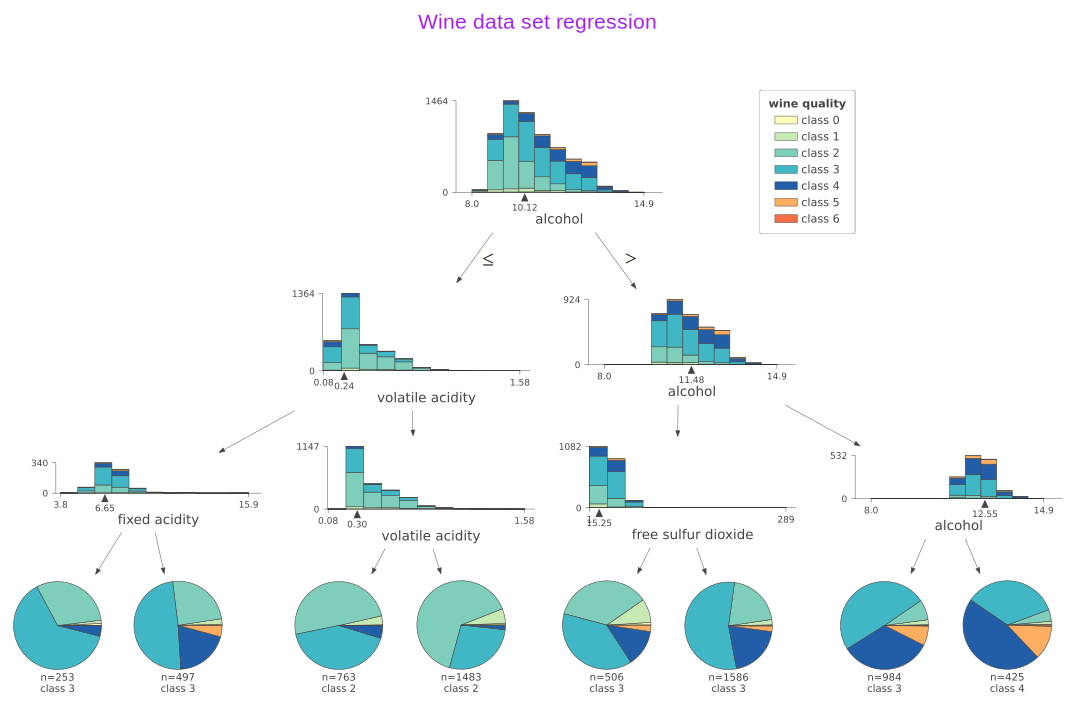

<Figure size 1800x1440 with 0 Axes>

In [ ]:
#orientation='LR'
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeClassifier(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               orientation='RR',
               scale=1.5)
viz


# Logistic Regression

## Customer churn with Logistic Regression
>create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

>use Logistic Regression for guidance on what would be the most probable class for a data point in order to estimate the class of that data point.

>Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. 

>It produces a formula that predicts the probability of the class label as a function of the independent variables.

<img
src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/model_output_probability_sigmoid.png?raw=1" width = "700" align = "center">

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Download Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/ChurnData.csv")
df.head()

tenure   age  address  income   ed  ...  loglong  logtoll  lninc  custcat  churn
0    11.0  33.0      7.0   136.0  5.0  ...    1.482    3.033  4.913      4.0    1.0
1    33.0  33.0     12.0    33.0  2.0  ...    2.246    3.240  3.497      1.0    1.0
2    23.0  30.0      9.0    30.0  1.0  ...    1.841    3.240  3.401      3.0    0.0
3    38.0  35.0      5.0    76.0  2.0  ...    1.800    3.807  4.331      4.0    0.0
4     7.0  35.0     14.0    80.0  2.0  ...    1.960    3.091  4.382      3.0    0.0

[5 rows x 28 columns]

## Pre-process Data

>select features for the modeling and change the target data type to be integer.

In [ ]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

KeyError: ignored

In [ ]:
df.shape

(200, 10)

In [ ]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

### Define Feature Matrix 

In [ ]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

### Define Target Variable

In [ ]:
y = np.asarray(df['churn'])
y [:5]

array([1, 1, 0, 0, 0])

## Normalize Dataset

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Split Dataset into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Model

>model using LogisticRegression from Scikit-learn package. 

>use liblinear numerical optimizer to find parameters

>Regularization
- Regularization is a technique used to solve the overfitting problem in machine learning models. 
- C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

> predict_proba returns estimates for all classes, ordered by the label of classes. 
- first column is the probability of class 1, P(Y=1|X)
- second column is probability of class 0, P(Y=0|X):

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluate

### Jaccard Index

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


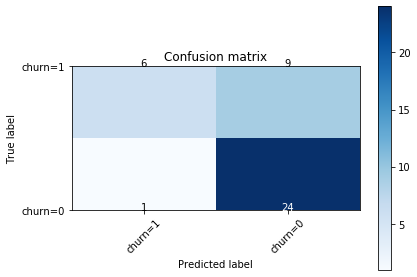

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### Log Loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

## Logistic Regression vs Linear Regression

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/model_of_customer_churn_data.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/predict_customer_income_with_linear_regression.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/predict_customer_churn_with_linear_regression.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/linear_regression_classification_problems.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/problem_with_linear_regression.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/sigmoid_function_logistic_regression.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/customer_chrun_model_clarification.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/logistic_regression_training_process.png?raw=1", width=800, height=600>
</p>

## Training of Logistic Regression Model

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/general_cost_function.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/plot_cost_function.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/logistic_regression_cost_function.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/minimize_cost_function.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/use_gradient_descent.png?raw=1", width=800, height=600>
</p>

<p align="center"> 
<img src="https://github.com/aymanibrahim/mlpy/blob/master/images/03_Classification/logistic_regression_training_algorithm.png?raw=1", width=800, height=600>
</p>

# Support Vector Machines

## Classify cells to benign or malignant
>build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/cell_samples.csv")
df.head()

ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl Mit  Class
0  1000025      5         1          1  ...           3         1   1      2
1  1002945      5         4          4  ...           3         2   1      2
2  1015425      3         1          1  ...           3         1   1      2
3  1016277      6         8          8  ...           3         7   1      2
4  1017023      4         1          1  ...           3         1   1      2

[5 rows x 11 columns]

## Visualize Data

> distribution of the classes based on Clump thickness and Uniformity of cell size

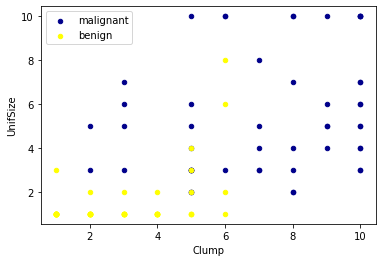

In [ ]:
ax = df[df['Class'] == 4][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Pre-process Data

In [ ]:
# look at columns data types
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

>BareNuc column includes some values that are not numerical
- drop non-numerical values

In [ ]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Define Feature Matrix 

In [ ]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

### Define Target Variable

In [ ]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [:5]

array([2, 2, 2, 2, 2])

## Split Dataset into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## Model

>Kernelling
- mapping data into a higher dimensional space 

>Kernel function
- The mathematical function used for the transformation

>Kernel function types:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

>usually choose different functions in turn and compare the results.

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC()

## Predict

In [ ]:
yhat = clf.predict(X_test)
yhat[:5]

array([2, 4, 2, 4, 2])

## Evaluate

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
clf.score(X_test, y_test)

0.9635036496350365

A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

In [ ]:

y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted   2   4  All
Actual                
2          85   5   90
4           0  47   47
All        85  52  137

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In the simplest terms, Precision is the ratio between the True Positives and all the Positives
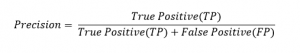

The recall is the measure of our model correctly identifying True Positives. 
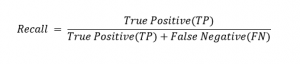

nstead of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well.
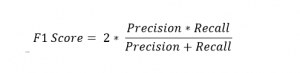

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


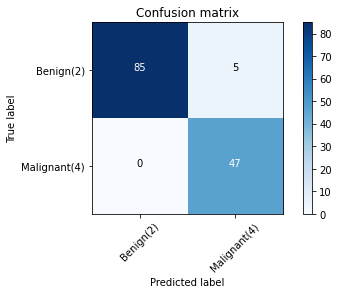

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#using different SVM kernels

In [ ]:
## Requried Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Load iris dataset
iris = datasets.load_iris()

## Create features and target data
X = iris.data[:, :2]
y = iris.target

## Plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

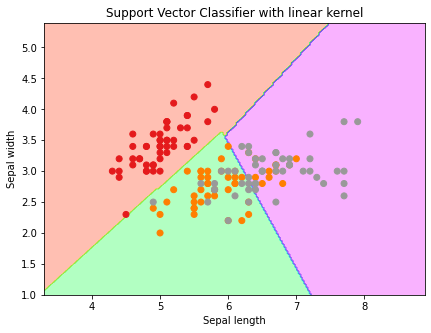

In [ ]:
## Creating the linear kernel
C = 1.0
svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

[]

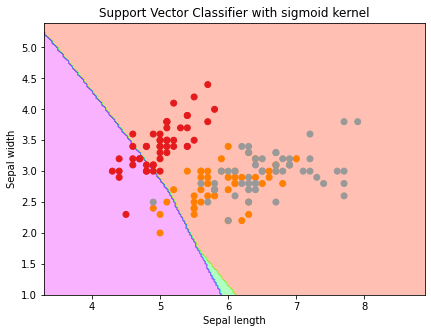

In [ ]:
## Sigmoid kernel
svc_classifier = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with sigmoid kernel')
plt.plot()

[]

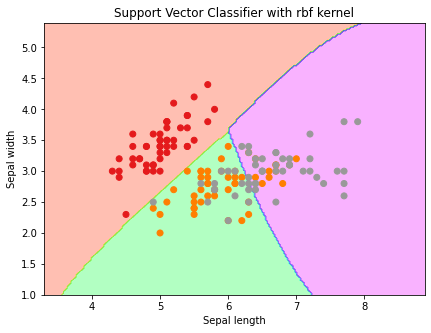

In [ ]:
## rbf kernel
svc_classifier = svm.SVC(kernel='rbf', C=C).fit(X, y)
C=1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating plots
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')
plt.plot()

[]

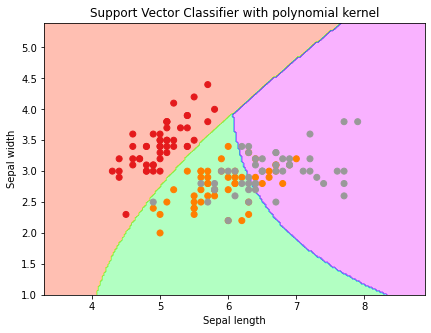

In [ ]:
## Polynomial kernel
svc_classifier = svm.SVC(kernel='poly', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code for creating the graph
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with polynomial kernel')
plt.plot()

#Random forest

I will compare random forests with decision-trees. Some salient features of comparison are as follows:-

Random forests is a set of multiple decision-trees.

Decision-trees are computationally faster as compared to random forests.

Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.

Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

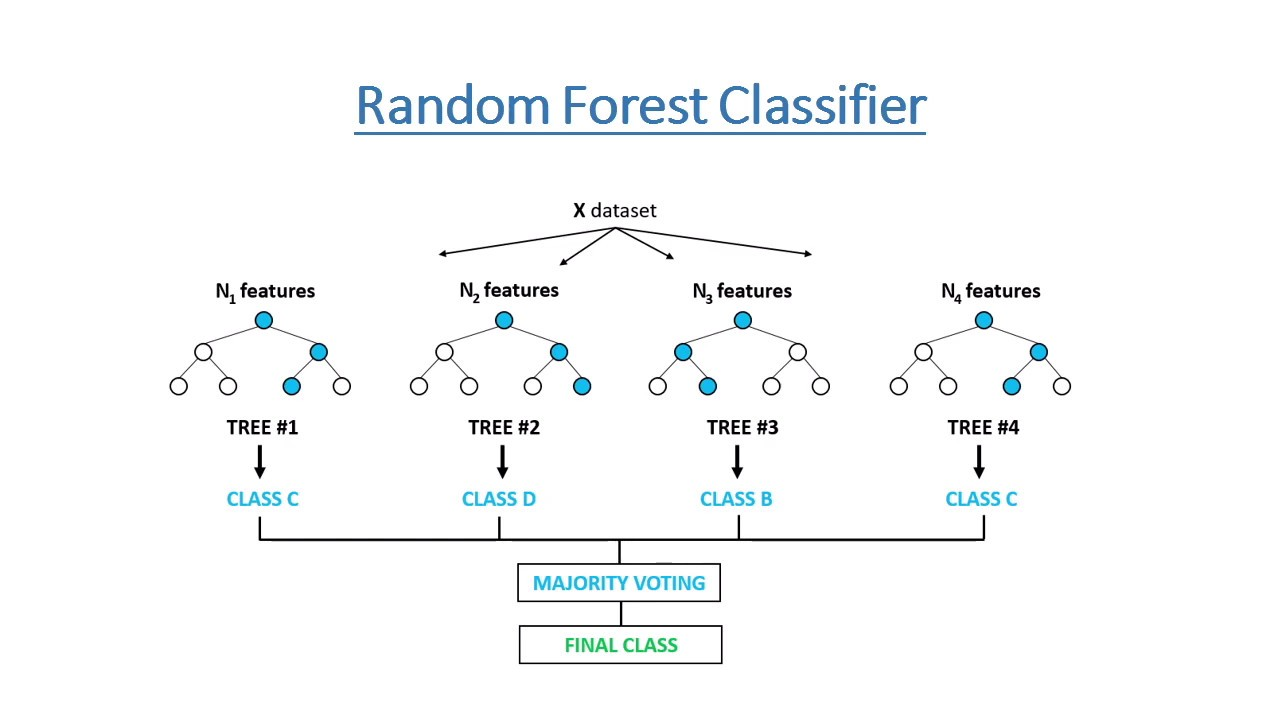

Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [ ]:
df.shape

In [ ]:
df.head()

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

In [ ]:
#assigning columnnames
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [ ]:
#exploring class variables
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
# check missing values in variables

df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
#Declare feature vector and target variable
X = df.drop(['class'], axis=1)

y = df['class']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 415 kB/s 


In [ ]:
#encoding categorical variables
# import category encoders

import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train.head()


buying  maint  doors  persons  lug_boot  safety
48         1      1      1        1         1       1
468        2      1      1        2         2       1
155        1      2      1        1         2       2
1721       3      3      2        1         2       2
1208       4      3      3        1         2       2

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

#rfc = RandomForestClassifier(n_estimators=10,random_state=0)
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 


from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


Here, we have build the Random Forest Classifier model with default parameter of n_estimators = 10

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

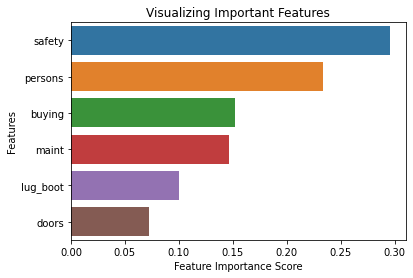

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [ ]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators = 100,random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9335


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


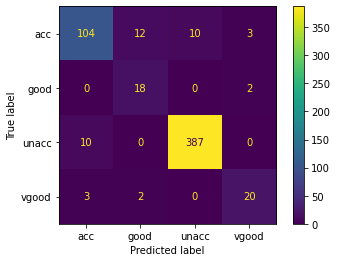

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



#ENSEMBLE LEARNING
The three most popular methods for combining the predictions from different models are:

Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.columns
# How many missing zeros are mising in each feature
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

BaggingClassifier:

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832168   0.636364  0.757576    0.734266      0.764357
recall       0.788079   0.700000  0.757576    0.744040      0.757576
f1-score     0.809524   0.666667  0.757576    0.738095      0.760049
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

print(scores)

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576}}


Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

AdaBoost
Stochastic Gradient Boosting

In [ ]:
#adabosst
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [ ]:
#gradient descent boosting
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[131  20]
 [ 37  43]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.779762   0.682540  0.753247    0.731151      0.746092
recall       0.867550   0.537500  0.753247    0.702525      0.753247
f1-score     0.821317   0.601399  0.753247    0.711358      0.745155
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [ ]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

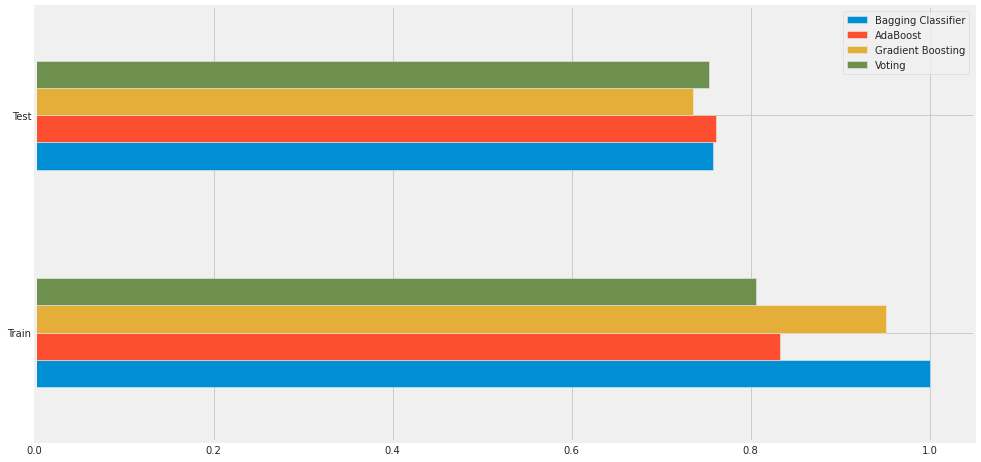

In [ ]:
#MODEL COMPARISON
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))